### Encadré par :

Mr. ES-SAADY Youssef

### Réalisé par :

BENAABIDATE Ahmed Walid.

EMSSAAD Ilyass

# Système de reconnaissance automatique des dégâts et symptômes sur plantes


# 1 : Prétraitements

Le but est de minimiser le nombre de données en retenant seulement les informations pertinentes. Cela implique l'utilisation de traitements de niveau inférieur sur l'image d'entrée du système, tels que la normalisation, l'élimination du bruit et la segmentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from math import exp, pow ,sqrt

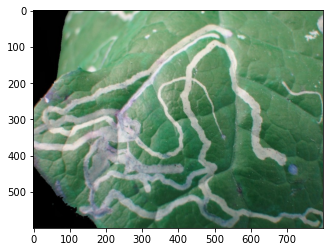

In [2]:

# charger l'image
img= cv2.imread("28.jpg")
# afficher l'image
plt.imshow(img)
plt.show()

In [4]:
def redimensionner(img):
    print ("Dimension image : ", img.shape)
    largeur = 200 
    hauteur = 150
    dimension = (largeur, hauteur)
    nouvelle_image=cv2.resize(img,dimension, interpolation = cv2.INTER_AREA)
    print ("Dimension nouvelle image : ", nouvelle_image.shape)
    return nouvelle_image

Dimension image :  (600, 800, 3)
Dimension nouvelle image :  (150, 200, 3)


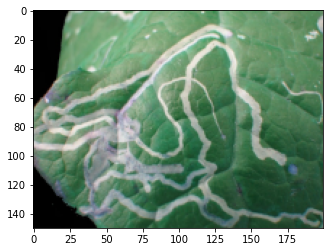

In [5]:
image_dimension= redimensionner(img)
plt.imshow(image_dimension)
plt.show()

In [7]:
def filtre_median(img,N):
    L,C=img.shape[0],img.shape[1]
    k=(N-1)//2
    imagefiltre=np.zeros((L,C),int)
    if(N%2!=0):
        if(L>N and C>N):
            for i in range(k,L-k):
                for j in range(k,C-k):
                    list=[]
                    for n in range(-k,k+1):
                        for m in range(-k,k+1):
                            list.append(img[i+n][j+m])
                    imagefiltre[i][j]=np.median(list)
    return imagefiltre

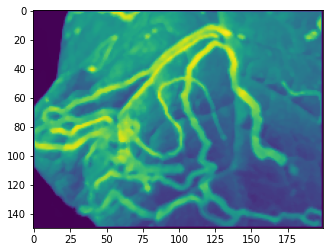

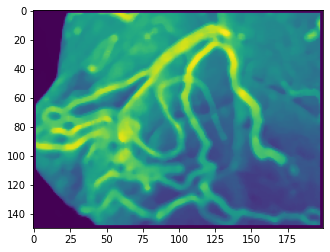

In [8]:
imagefiltree1=filtre_median(image_dimension,3)
plt.imshow(imagefiltree1)
plt.show()
imagefiltree2=filtre_median(image_dimension,5)
plt.imshow(imagefiltree2)
plt.show()

# 2: Segmentation

Dans le domaine de la détection des maladies des plantes, le clustering k-means permet de diviser l'image d'entrée en k clusters, où un seul cluster comprend la zone touchée par la maladie. Les étapes impliquées dans la segmentation par clustering k-means pour extraire la zone de la lésion sont les suivantes :

Lire l’image d’entrée.

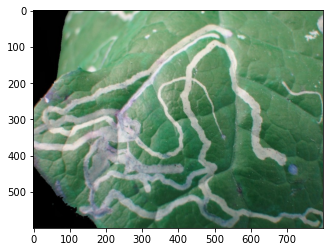

In [9]:
img2 = cv2.imread("28.jpg")
plt.imshow(img2)
plt.show()

Transformer l'image de l'espace couleur RGB vers l'espace de couleur L * a * b * (également appelé CIELab). Cette conversion permet d'évaluer les différences visuelles présentées dans l'image RGB en utilisant Python et OpenCV.

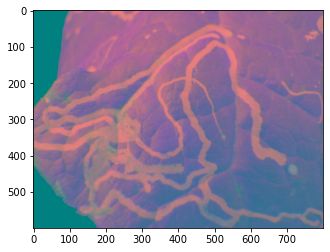

In [10]:
lab_img = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)

# Sauvegarder l'image en L*a*b*
cv2.imwrite("lab_image.jpg", lab_img)
plt.imshow(lab_img)
plt.show()

Classer les couleurs des objets dans l'espace "a * b *" en utilisant la méthode de clustering k-means qui traite chaque objet dans cet espace. Cette méthode trouve des groupes tels que les objets dans chaque groupe sont aussi proches les uns des autres que possible et éloignés des objets d'autres clusters en utilisant OpenCV et Python.

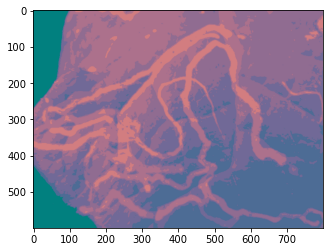

In [11]:
import numpy as np
import cv2
# Charger l'image en couleur L*a*b*
img = cv2.imread("lab_image.jpg")
Z = img.reshape((-1,3))
Z = np.float32(Z)

#Initialiser les centres de clusters (centres de couleurs) :
K = 6
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Convertir les centres de couleurs en entiers 8 bits et les utiliser pour colorer les objets dans l'image :
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#Afficher le résultat final :
plt.imshow(res2)
plt.show()



Attribuer une étiquette à chaque pixel de l'image en utilisant les résultats de k-means : pour chaque objet dans l'image d'entrée, k-means renvoie un indice correspondant à un cluster. Cet indice est utilisé pour étiqueter chaque pixel dans l'image en utilisant Python et OpenCV.

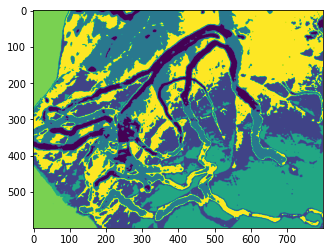

In [12]:
import cv2
import numpy as np

# Charger l'image en couleur L*a*b*
img = cv2.imread("lab_image.jpg")

# Convertir l'image en un format numérique numpy
img_reshaped = img.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

# Définir le nombre de clusters (K)
K = 6

# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Exécuter l'algorithme K-means
ret, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étiqueter chaque pixel de l'image en utilisant les résultats de K-means
label_img = label.reshape((img.shape[0], img.shape[1]))

# Sauvegarder l'image étiquetée
cv2.imwrite("labeled_image.jpg", label_img)
plt.imshow(label_img)
plt.show()


Dans ce code, l'image en format L * a * b * est tout d'abord chargée à l'aide de la fonction cv2.imread(). Elle est ensuite convertie en format numpy pour une manipulation plus aisée. Le nombre de clusters (K) est fixé à 4, mais peut être modifié en fonction des besoins.

Des critères de fin sont définis pour déterminer quand l'exécution de l'algorithme K-means doit s'arrêter. La fonction cv2.kmeans() est utilisée pour exécuter l'algorithme K-means et trouver les centres des clusters.

Chaque pixel de l'image est alors étiqueté en utilisant les étiquettes renvoyées par la méthode K-means. Le tableau d'étiquettes est converti en une image de la même taille que l'image d'entrée, où chaque entrée représente l'indice du cluster auquel appartient le pixel correspondant. Finalement, l'image est affichée.

Générer les images de segmentation de l'image d'origine : dans cette étape, le résultat est k images, chacune représentant un segment de l'image d'origine en utilisant python et opencv.

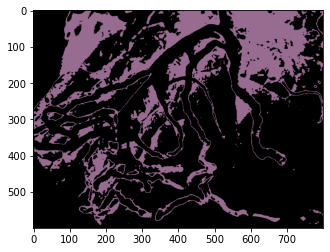

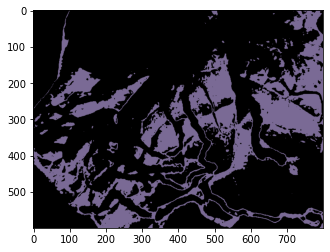

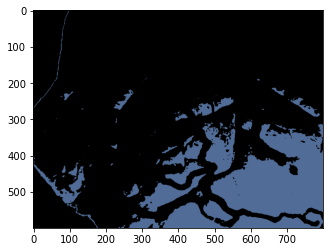

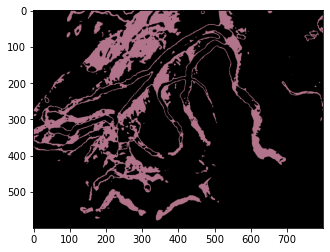

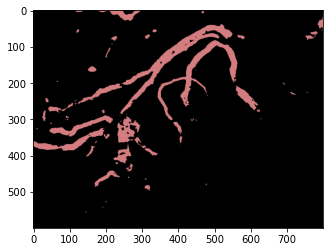

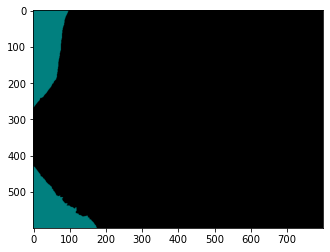

In [13]:
import cv2
import numpy as np

# Charger l'image en couleur L*a*b*
img = cv2.imread("lab_image.jpg")

# Convertir l'image en un format numérique numpy
img_reshaped = img.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

# Définir le nombre de clusters (K)
K = 6

# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Exécuter l'algorithme K-means
ret, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étiqueter chaque pixel de l'image en utilisant les résultats de K-means
label_img = label.reshape((img.shape[0], img.shape[1]))

# Boucle sur chaque cluster pour créer les images de segmentation
for i in range(K):
    segmented_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    segmented_img[label_img == i] = center[i].astype(np.uint8)

    # Sauvegarder l'image de segmentation
    cv2.imwrite("segmented_image_" + str(i) + ".jpg", segmented_img)
    plt.imshow(segmented_img)
    plt.show()
    

Dans ce code, l'image en L * a * b * est tout d'abord importée et convertie en un format Numpy pour une manipulation plus facile. Le nombre de clusters (K) est établi à 4, mais peut être adapté selon les besoins. La méthode K-means est ensuite lancée pour déterminer les centres des clusters et étiqueter chaque pixel de l'image.
Puis, nous bouclons sur chaque cluster pour créer une image de segmentation pour chaque segment. Pour ce faire, nous créons une image noire avec np.zeros() et colorons les pixels associés à ce cluster en utilisant les couleurs représentatives du cluster (centre). Enfin, chaque image de segmentation est enregistrée sous un nom différent en utilisant la fonction cv2.imwrite().

### Sélectionner le cluster contenant la zone de la lésion.

Pour identifier le cluster qui comprend la zone de la lésion, nous pouvons faire appel aux étiquettes produites par la méthode K-means. Après avoir étiqueté chaque pixel de l'image, nous pouvons compter le nombre de pixels pour chaque cluster pour déterminer le plus important. Le cluster qui a le plus grand nombre de pixels peut être considéré comme celui qui comprend la zone de la lésion.

Zone de la lésion extraite.


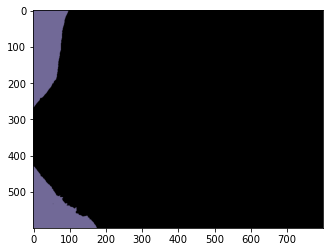

In [14]:
import cv2
import numpy as np

# Charger l'image en couleur L*a*b*
img = cv2.imread("lab_image.jpg")

# Convertir l'image en un format numérique numpy
img_reshaped = img.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

# Définir le nombre de clusters (K)
K = 6

# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Exécuter l'algorithme K-means
ret, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Étiqueter chaque pixel de l'image en utilisant les résultats de K-means
label_img = label.reshape((img.shape[0], img.shape[1]))

# Compter le nombre de pixels pour chaque cluster
pixel_counts = [0] * K
for i in range(K):
    pixel_counts[i] = np.sum(label_img == i)
# Déterminer l'index du cluster le plus important
min_index = np.argmin(pixel_counts)
# Sélectionner le cluster contenant la zone de la lésion
lesion_cluster = center[min_index].astype(np.uint8)
segmented_img1 = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
segmented_img1[label_img ==min_index] = center[i].astype(np.uint8)
print("Zone de la lésion extraite.")
cv2.imwrite("segmented_image.jpg", segmented_img1)
plt.imshow(segmented_img1)
plt.show()

# 3: Extraction des caractéristiques

# Primitives de la couleur

Une fonction pour convertir l'image en système chromatique HSV (teinte, saturation, valeur) en utilisant OpenCV et Python est fournie ici :

In [15]:

def conversion_to_HSV(img):
    # Convertir l'image en système chromatique HSV
    HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Séparer les canaux HSV en trois images différentes
    h, s, v = cv2.split(HSV_image)
    # Renvoyer les canaux HSV séparés
    return h, s, v


Voici une fonction qui calcule les composantes de la couleur HSV (teinte, saturation, valeur) d'une image en utilisant OpenCV et Python : Elle prend une image en couleur RGB en entrée, la convertit en couleur BGR avec cv2.cvtColor(), puis la transforme en système chromatique HSV en utilisant à nouveau cv2.cvtColor(). Les canaux HSV sont séparés en teinte (h), saturation (s) et valeur (v) grâce à la fonction cv2.split() et les images associées sont renvoyées par la fonction.

In [16]:
imgconversiontoHSV=conversion_to_HSV(segmented_img1)
print(imgconversiontoHSV)

(array([[175, 175, 175, ...,   0,   0,   0],
       [175, 175, 175, ...,   0,   0,   0],
       [175, 175, 175, ...,   0,   0,   0],
       ...,
       [175, 175, 175, ...,   0,   0,   0],
       [175, 175, 175, ...,   0,   0,   0],
       [175, 175, 175, ...,   0,   0,   0]], dtype=uint8), array([[78, 78, 78, ...,  0,  0,  0],
       [78, 78, 78, ...,  0,  0,  0],
       [78, 78, 78, ...,  0,  0,  0],
       ...,
       [78, 78, 78, ...,  0,  0,  0],
       [78, 78, 78, ...,  0,  0,  0],
       [78, 78, 78, ...,  0,  0,  0]], dtype=uint8), array([[151, 151, 151, ...,   0,   0,   0],
       [151, 151, 151, ...,   0,   0,   0],
       [151, 151, 151, ...,   0,   0,   0],
       ...,
       [151, 151, 151, ...,   0,   0,   0],
       [151, 151, 151, ...,   0,   0,   0],
       [151, 151, 151, ...,   0,   0,   0]], dtype=uint8))


Dans la méthode des moments de couleur, trois moments spécifiques qui ne varient pas avec les transformations sont utilisés pour extraire les caractéristiques de la couleur dans le domaine de la reconnaissance des maladies des plantes.

Dans le cadre de la reconnaissance de maladies de plantes, les moments de couleur d'une image peuvent être obtenus en utilisant la méthode des moments. Elle consiste à évaluer des indicateurs statistiques tels que la moyenne, l'écart-type et l'asymétrie pour chaque canal de couleur (rouge, vert, bleu) de l'image.

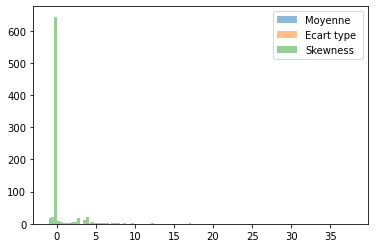

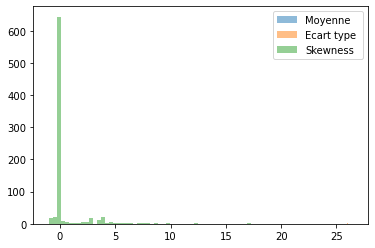

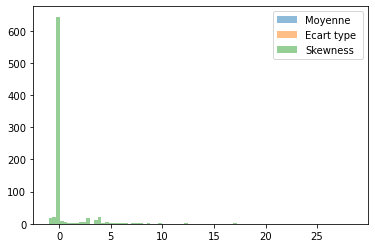

In [18]:

import scipy.stats
import matplotlib.pyplot as plt

#Séparer les canaux de couleur :
b, g, r = cv2.split(segmented_img1)
#Calculer les moments pour chaque canal de couleur :
r_mean = np.mean(r)
g_mean = np.mean(g)
b_mean = np.mean(b)

r_std = np.std(r)
g_std = np.std(g)
b_std = np.std(b)

r_skew = scipy.stats.skew(r)
g_skew = scipy.stats.skew(g)
b_skew = scipy.stats.skew(b)


#Stocker les moments de couleur dans un tableau :
color_moments = [r_mean, g_mean, b_mean, r_std, g_std, b_std, r_skew, g_skew, b_skew]
# Afficher un histogramme des moments de couleur R
plt.hist(r_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(r_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(r_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()
# Afficher un histogramme des moments de couleur G

plt.hist(g_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(g_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(g_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()
# Afficher un histogramme des moments de couleur B

plt.hist(b_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(b_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(b_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()


Calculer les moments de couleur d'une image peut être fait à l'aide de la méthode des moments. Cette méthode consiste à mesurer certaines statistiques de l'image, telles que la moyenne, l'ecart type, et l'Asymétrie, pour chaque canal de couleur (H, S, V) de l'image.

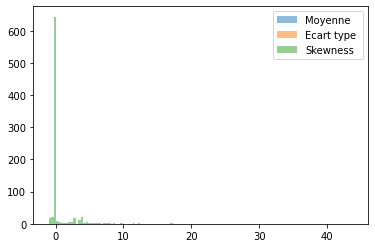

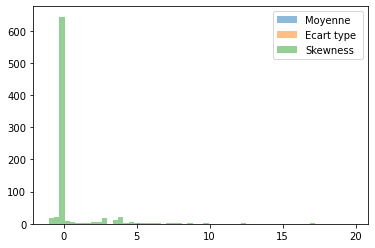

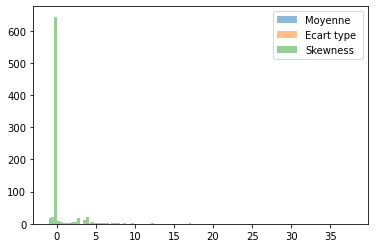

In [19]:
import cv2
import scipy.stats
hsv_image = cv2.cvtColor(segmented_img1, cv2.COLOR_BGR2HSV)
#Séparer les canaux de couleur :
h, s, v = cv2.split(hsv_image)
#Calculer les moments pour chaque canal de couleur :
h_mean = np.mean(h)
s_mean = np.mean(s)
v_mean = np.mean(v)

h_std = np.std(h)
s_std = np.std(s)
v_std = np.std(v)

h_skew = scipy.stats.skew(h)
s_skew = scipy.stats.skew(s)
v_skew = scipy.stats.skew(v)


#Stocker les moments de couleur dans un tableau :
color_moments = [h_mean, s_mean, v_mean, h_std, s_std, v_std, h_skew, s_skew, v_skew]
# Afficher un histogramme des moments de couleur H
plt.hist(h_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(h_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(h_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()
# Afficher un histogramme des moments de couleur S

plt.hist(s_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(s_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(s_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()
# Afficher un histogramme des moments de couleur V

plt.hist(v_mean, bins=50, alpha=0.5, label='Moyenne')
plt.hist(v_std, bins=50, alpha=0.5, label='Ecart type ')
plt.hist(v_skew, bins=50, alpha=0.5, label='Skewness')
plt.legend(loc='upper right')
plt.show()





Calcul des matrices de co-occurrence des niveaux de gris (GLCM)
Pour caractériser la texture d'une image, on peut utiliser les matrices de co-occurrence des niveaux de gris (GLCM). Cela consiste à mesurer la fréquence d'apparition de chaque couple de niveaux de gris dans l'image. Avec les matrices GLCM, on peut ensuite calculer différentes mesures de texture telles que l'énergie, le contraste, la corrélation, l'entropie et le moment différentiel inverse.

In [20]:

import skimage.color
def fast_glcm(img, vmin=0, vmax=255, levels=8, kernel_size=5, distance=1.0, angle=0.0):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape
    bins = np.linspace(mi, ma+1, levels+1)
    gl1 = np.digitize(img, bins) - 1
    dx = distance*np.cos(np.deg2rad(angle))
    dy = distance*np.sin(np.deg2rad(-angle))
    mat = np.array([[1.0,0.0,-dx], [0.0,1.0,-dy]], dtype=np.float32)
    gl2 = cv2.warpAffine(gl1, mat, (w,h), flags=cv2.INTER_NEAREST,borderMode=cv2.BORDER_REPLICATE)
  # make glcm
    glcm = np.zeros((levels, levels, h, w), dtype=np.uint8)
    for i in range(levels):
        for j in range(levels):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(levels):
        for j in range(levels):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)
    glcm = glcm.astype(np.float32)
    return glcm

def fast_glcm_contrast(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(levels):
        for j in range(levels):
            cont += glcm[i,j] * (i-j)**2
    return cont


def fast_glcm_homogeneity(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(levels):
        for j in range(levels):
            homo += glcm[i,j] / (1.+(i-j)**2)
    return homo

def fast_glcm_mean(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(levels):
        for j in range(levels):
            mean += glcm[i,j] * i / (levels)**2
    return mean

def fast_glcm_std(img, vmin=0, vmax=255, levels=8, ks=5, distance=1.0, angle=0.0):
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, levels, ks, distance, angle)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(levels):
        for j in range(levels):
            mean += glcm[i,j] * i / (levels)**2
    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(levels):
        for j in range(levels):
            std2 += (glcm[i,j] * (i - mean))**2
    std = np.sqrt(std2)
    return std

def glcm_correlation(glcm):
    row_sum = glcm.sum(axis=0)
    col_sum = glcm.sum(axis=1)
    px_mean = row_sum.mean()
    py_mean = col_sum.mean()
    cov = 0
    for i in range(glcm.shape[0]):
        for j in range(glcm.shape[1]):
            cov += (i + 1 - px_mean) * (j + 1 - py_mean) * glcm[i, j]
    px_var = row_sum.var()
    py_var = col_sum.var()
    corr = cov / (px_var * py_var)**0.5
    return corr

def calculate_energy(glcm):
    return np.sqrt(np.sum(np.square(glcm)))

def glcm_entropy(glcm):
    # Calculate the probability of co-occurrence
    p = glcm / np.sum(glcm)
    # Calculate the entropy
    entropy = -np.sum(p * np.log2(p))
    return entropy


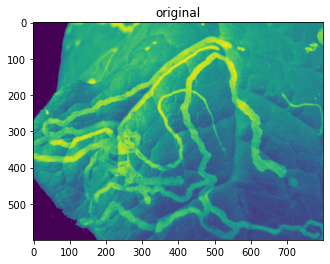

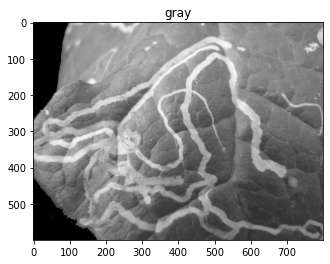

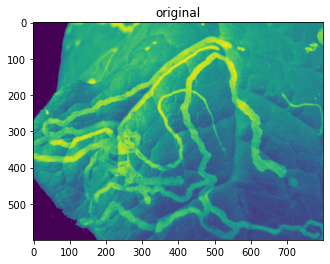

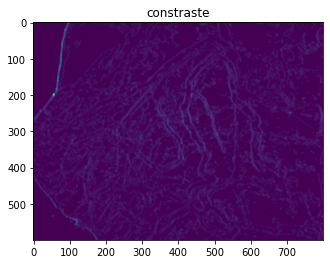

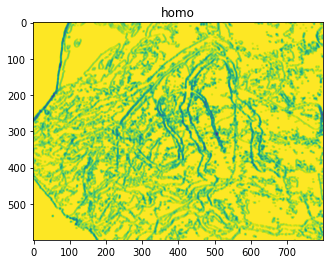

In [21]:
image = cv2.imread('28.jpg',0)
plt.imshow(np.squeeze(image))
plt.title('original') 
plt.show()
# read input image, based on filename parameter
img = cv2.imread("28.jpg",0)
# display grayscale image
plt.imshow(np.squeeze(img), cmap="gray")
plt.title('gray')
plt.show()    
cor = glcm_correlation(img)
cont = fast_glcm_contrast(img)
homo = fast_glcm_homogeneity(img)
plt.imshow(img)
plt.title('original') 
plt.show()
plt.imshow(cont)
plt.title('constraste') 
plt.show()
plt.imshow(homo)
plt.title('homo') 
plt.show()





Les primitives de la forme représentent les différentes propriétés géométriques d’une
forme. Dans le domaine de reconnaissance des maladies des plantes, les descripteurs de
forme sont les plus adoptés dans ce contexte. Ces derniers consistent à étudier les taches
maladies comme des régions ayant des caractéristiques géométriques plus spécifiques. En
effet, il existe plusieurs descripteurs de forme,

Pour calculer les primitives de forme telles que l'aire, le périmètre, la circularité et la complexité d'une image en utilisant python et OpenCV, vous pouvez utiliser les étapes suivantes :

1-Binariser l'image : Pour calculer les primitives de forme, vous devez d'abord convertir l'image en une image binaire en seulement deux couleurs, noir et blanc. Vous pouvez utiliser la fonction cv2.threshold() de OpenCV pour atteindre cet objectif.

2-Trouver les contours de l'objet : En utilisant la fonction cv2.findContours(), vous pouvez trouver les contours de l'objet dans l'image binaire.

3-Calculer l'aire : Vous pouvez utiliser la fonction cv2.contourArea() pour calculer l'aire de l'objet.

4-Calculer le périmètre : Vous pouvez utiliser la fonction cv2.arcLength() pour calculer le périmètre de l'objet.

5-Calculer la circularité : La circularité d'un objet peut être définie comme le rapport entre le périmètre et le diamètre d'un cercle ayant la même aire que l'objet. Vous pouvez utiliser la formule suivante pour calculer la circularité : circularité = 4 * pi * aire / (périmètre ** 2)

6-Calculer la complexité : La complexité peut être définie comme le rapport entre le périmètre et la longueur d'un cercle ayant le même aire que l'objet. 7-Vous pouvez utiliser la formule suivante pour calculer la complexité : complexité = périmètre / (2 * pi * rayon). Où rayon peut être trouvé en utilisant la formule suivante : rayon = sqrt(aire / pi).

In [22]:
import cv2
import numpy as np

# Charger une image en niveaux de gris
image = cv2.imread('28.jpg')
# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Définir un seuil de luminosité
threshold_value = 128
# Appliquer le seuil à l'image en niveaux de gris
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
# Enregistrer l'image binaire
cv2.imwrite('binary_image.jpg', binary_image)

def calculate_area(binary_image):
    return cv2.countNonZero(binary_image)

def calculate_perimeter(gray_image):
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return int(cv2.arcLength(contours[0], True))
  

def calculate_circularity(image, threshold=127):
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un seuillage binaire pour extraire le contour de l'objet
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    
    # Trouver les contours dans l'image binaire
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sélectionner le contour le plus grand (correspondant à l'objet)
    cnt = max(contours, key=cv2.contourArea)
    
    # Calculer la circonférence et le périmètre de l'objet
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    circumference = 2 * np.pi * radius
    perimeter = cv2.arcLength(cnt, True)
    
    # Calculer la circularité en utilisant le rapport entre la circonférence et le périmètre
    circularity = circumference / perimeter
    
    return circularity

def calculate_fractal_dimension(obj_edge):
    # obtenir la longueur de la bordure de l'objet
    obj_edge_length = len(obj_edge)
    
    # initialiser un tableau pour stocker le nombre de boîtes nécessaires à la couverture de l'objet
    num_boxes = []
    
    # boucle sur les tailles de boîte décroissantes
    for box_size in np.logspace(0, np.log10(obj_edge_length), 50):
        box_size = int(box_size)
        
        # initialiser un compteur de boîte pour ce taille de boîte
        box_count = 0
        
        # boucle sur chaque pixel sur la bordure de l'objet
        for i in range(0, obj_edge_length, box_size):
            for j in range(0, obj_edge_length, box_size):
                if obj_edge[i:i + box_size, j:j + box_size].sum() > 0:
                    box_count += 1
        
        # ajouter le nombre de boîtes pour cette taille de boîte à notre tableau
        num_boxes.append(box_count)
    
    # transformer les données en une forme utilisable pour la régression
    log_box_sizes = np.log(1.0 / np.array(num_boxes))
    log_num_boxes = np.log(np.array(num_boxes))
    
    # effectuer une régression linéaire sur les données pour trouver la dimension fractale
    slope, _ = np.polyfit(log_box_sizes, log_num_boxes, 1)
    fractal_dimension = -slope
    
    return fractal_dimension


In [23]:
perimeter=calculate_perimeter(binary_image)
print(perimeter)
area=calculate_area(binary_image)
print(area)
circularity=calculate_circularity(image, threshold=127)
print(circularity)
fractal=calculate_fractal_dimension(image)
print(fractal)


0
211274
0.29851349674083405
1.0
